# Pandas チュートリアル

- Original: [7. Pandas - IPython Notebook Tutorial](https://www.youtube.com/watch?v=04zBNE2ZHSI) on YouTube
- [ipython notebook](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/7%20-%20Pandas.ipynb)

# ライブラリの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pandasの主要なデータ構造

| コマンド | 説明 |
|:--|:--|
| pd.Series | インデックス付きの1次元データ |
| pd.DataFrame | インデックス付きの2次元データ |
| pd.Panel | インデックス付きの3次元データ |

# シリーズ（Series）

シリーズは配列のようなオブジェクト。

`pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)`

In [2]:
# リストからシリーズを作成
x = pd.Series([1, 2, 3, 4, 5])

In [3]:
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 基本的な処理

In [4]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [5]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [6]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

## any() and all()

In [7]:
larger_than_2 = x > 2

In [8]:
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [9]:
larger_than_2.any()

True

In [10]:
larger_than_2.all()

False

## apply()

In [11]:
def f(x):
    if x % 2 == 0:
        return x * 2  # 偶数なら2をかける 
    else: 
        return x * 3  # 奇数なら3をかける

In [12]:
x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

### forループは避けるべし

In [13]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

10 loops, best of 3: 154 ms per loop


In [14]:
%%timeit

ds = pd.Series(range(10000))

ds = ds.apply(f)

100 loops, best of 3: 3.99 ms per loop


## astype()

In [15]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

## copy()

In [16]:
y = x

In [17]:
y[0]

1

In [18]:
y[0] = 100

In [19]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [20]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

### copyの使用は最小限にすべし（メモリの使用）

In [21]:
y = x.copy()

In [22]:
x[0] = 1

In [23]:
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [24]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [25]:
x.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

# データフレーム（DataFrame）

`pd.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)`

In [26]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data, columns=["x"])

In [27]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


## データの選択

In [28]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [29]:
df["x"][0]

1

## カラムの追加

In [30]:
df["x_plus_2"] = df["x"] + 2

In [31]:
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [32]:
df["x_square"] = df["x"] ** 2

In [33]:
df["x_factorial"] = df["x"].apply(np.math.factorial)

In [34]:
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [35]:
df["is_even"] = df["x"] % 2 == 0

In [36]:
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,False
1,2,4,4,2,True
2,3,5,9,6,False
3,4,6,16,24,True
4,5,7,25,120,False
5,6,8,36,720,True
6,7,9,49,5040,False
7,8,10,64,40320,True
8,9,11,81,362880,False


## map()

In [37]:
df["odd_even"] = df["is_even"].map({False:"odd", True:"even"})

In [38]:
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,False,odd
1,2,4,4,2,True,even
2,3,5,9,6,False,odd
3,4,6,16,24,True,even
4,5,7,25,120,False,odd
5,6,8,36,720,True,even
6,7,9,49,5040,False,odd
7,8,10,64,40320,True,even
8,9,11,81,362880,False,odd


## drop()

In [39]:
df = df.drop("is_even", axis=1)

In [40]:
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


## 複数カラムの選択

In [41]:
df[["x", "odd_even"]] # two bracket

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


## 表示オプションのコントロール

In [42]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 5
pd.options.display.notebook_repr_html = True

In [43]:
df

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
...,...,...,...,...,...
7,8,10,64,40320,even
8,9,11,81,362880,odd


## フィルタリング

In [44]:
df[df["odd_even"] == "odd"]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
2,3,5,9,6,odd
4,5,7,25,120,odd
6,7,9,49,5040,odd
8,9,11,81,362880,odd


In [45]:
df[df.odd_even == "even"]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even
5,6,8,36,720,even
7,8,10,64,40320,even


## 複数フィルタリング

### | OR

In [46]:
df[(df.odd_even == "even") | (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
...,...,...,...,...,...
5,6,8,36,720,even
7,8,10,64,40320,even


In [47]:
df[(df.odd_even == "even") & (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,odd_even
1,2,4,4,2,even
3,4,6,16,24,even


### Further Chaining

In [48]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1]

1    4
Name: x_plus_2, dtype: int64

## scatter_matrix()

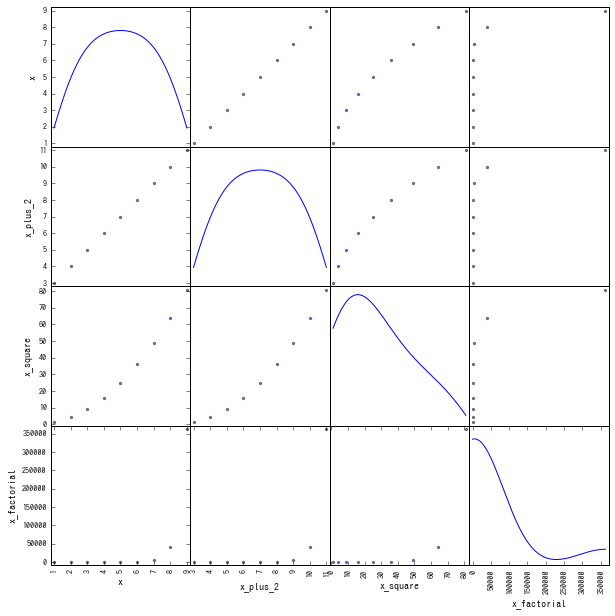

In [49]:
pd.scatter_matrix(df, 
                  diagonal="kde", 
                  #diagonal="hist", 
                  figsize=(10, 10));

In [50]:
df.describe()

,x,x_plus_2,x_square,x_factorial
count,9.0,9.0,9.000000,9.0
mean,5.0,7.0,31.666667,45457.0
...,...,...,...,...
75%,7.0,9.0,49.000000,5040.0
max,9.0,11.0,81.000000,362880.0


In [51]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASI&output=csv"

In [52]:
stocks_data = pd.read_csv(url)

In [53]:
stocks_data

,Date,Open,High,Low,Close,Volume
0,4-Dec-16,7093.66,7204.66,7092.85,7130.34,401397790
1,1-Dec-16,7000.18,7117.63,7001.79,7093.66,373539207
...,...,...,...,...,...,...
246,9-Dec-15,6991.44,7040.56,6979.24,7000.72,234520298
247,8-Dec-15,7166.73,7165.12,6959.33,6991.44,237516400


In [54]:
#stocks_data["change_amount"] = stocks_data["Close"] - stocks_data["Open"]

In [55]:
#stocks_data["change_percentage"] = stocks_data["change_amount"] / stocks_data["Close"]

In [56]:
stocks_data.index = pd.to_datetime(stocks_data.pop('Date'))

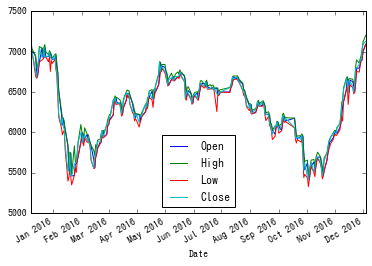

In [59]:
stocks_data[['Open', 'High', 'Low', 'Close']].plot()